In [4]:
import pandas as pd
import janitor
from utilities import (
    check_make_dir,
    save_mpl_fig,
    plotline, 
)
check_make_dir('../data', '../figures')
FP = '../data/titlelength.csv'

In [5]:
if False:
    LF_FP = '../../readable_news_lf/toi_parsed_all.csv.gz'
    periods = (2008-1839 + 1)*4 + 1
    time_index = pd.date_range("10/01/1838", periods=periods, freq="QS")

    df = (pd.read_csv(LF_FP, usecols=["RecordTitle", "NumericPubDate"])
          .clean_names()
          .assign(
              date=lambda df: pd.to_datetime(df.numericpubdate, format='%Y%m%d'),
              qtr=lambda df: [dt.to_period('Q') for dt in df.date],
              titlelen=lambda df: df.recordtitle.str.len()
          )
          .remove_columns('numericpubdate')
         )

    nsample = len(df)
    df = (df      
          .groupby(['qtr']).mean().reset_index()
          .sort_values('qtr')
          .set_index('qtr')
          .reindex([dt.to_period('Q')for dt in time_index])      
          .reset_index()      
         )
    df.to_csv(FP, index=False)
df = pd.read_csv(FP)    
df.head(3)

,qtr,titlelen
0,1838Q4,21.942266
1,1839Q1,22.198604
2,1839Q2,22.966168


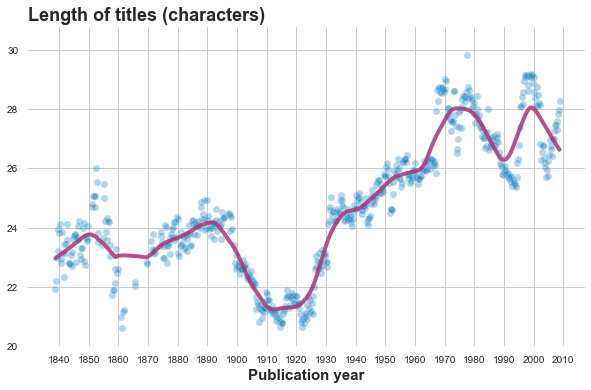

In [3]:
ax = plotline(x=df.index, y=df.titlelen, 
              bw=0.1,
              xrange=range(5, len(df)+40, 40),
              xticklabels=range(1840, 2015, 10),
              yrange=range(20,32,2), 
              markersize=50,
              tickersize=10,
              title='Length of titles (characters)', 
             )    
save_mpl_fig('../figures/titlelength')